In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load data into a pandas dataframe
df_weather = pd.read_csv('weather_bbsr_1990_2022.csv')
print(df_weather.head())

         time  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
0  1990-01-01  20.1   NaN  28.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN
1  1990-01-02  20.7  16.4   NaN   0.0   NaN   NaN   NaN   NaN   NaN   NaN
2  1990-01-03  20.7  16.0  27.4   0.0   NaN   NaN   NaN   NaN   NaN   NaN
3  1990-01-04  18.8   NaN  28.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN
4  1990-01-05  19.8  11.0  28.2   0.0   NaN   NaN   NaN   NaN   NaN   NaN


In [3]:
# Display the shape of the dataframe
print("Shape of the dataframe:", df_weather.shape)

Shape of the dataframe: (11935, 11)


In [4]:
df_weather.rename(columns={'time': 'date'}, inplace=True)
print(df_weather.head())

         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
0  1990-01-01  20.1   NaN  28.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN
1  1990-01-02  20.7  16.4   NaN   0.0   NaN   NaN   NaN   NaN   NaN   NaN
2  1990-01-03  20.7  16.0  27.4   0.0   NaN   NaN   NaN   NaN   NaN   NaN
3  1990-01-04  18.8   NaN  28.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN
4  1990-01-05  19.8  11.0  28.2   0.0   NaN   NaN   NaN   NaN   NaN   NaN


In [5]:
# Display the data types of each column
print("Data types of each column:")
print(df_weather.dtypes)

# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df_weather.nunique())

# Display the count of non-null values in each column
print("\nCount of non-null values in each column:")
print(df_weather.count())

Data types of each column:
date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

Number of unique values in each column:
date    11935
tavg      204
tmin      216
tmax      244
prcp      312
snow        0
wdir      290
wspd      250
wpgt        0
pres      233
tsun        0
dtype: int64

Count of non-null values in each column:
date    11935
tavg    11857
tmin     9845
tmax    11044
prcp     6838
snow        0
wdir     1294
wspd     2129
wpgt        0
pres     1243
tsun        0
dtype: int64


In [6]:
# Display information about the dataframe
df_weather.info()

# Display descriptive statistics of the dataframe
print("\nDescriptive statistics of the dataframe:")
print(df_weather.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11935 non-null  object 
 1   tavg    11857 non-null  float64
 2   tmin    9845 non-null   float64
 3   tmax    11044 non-null  float64
 4   prcp    6838 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    1294 non-null   float64
 7   wspd    2129 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    1243 non-null   float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.0+ MB

Descriptive statistics of the dataframe:
               tavg         tmin          tmax         prcp  snow  \
count  11857.000000  9845.000000  11044.000000  6838.000000   0.0   
mean      26.991617    22.237247     32.996686     7.073603   NaN   
std        3.530459     4.515201      3.709543    21.150614   NaN   
min       15.700000     8.200000     19

In [7]:
# Find all null values in each column
null_values = df_weather.isnull().sum()
print("Null values in each column:")
print(null_values)

# Calculate total null values
total_null_values = df_weather.isnull().sum().sum()
print("\nTotal null values in the dataframe:", total_null_values)

Null values in each column:
date        0
tavg       78
tmin     2090
tmax      891
prcp     5097
snow    11935
wdir    10641
wspd     9806
wpgt    11935
pres    10692
tsun    11935
dtype: int64

Total null values in the dataframe: 75100


In [8]:
unique_wind_speeds = df_weather['wspd'].dropna().unique()
print("Unique Wind Speed values:")
print(unique_wind_speeds)

# Calculate the number of unique wind speed values
num_unique_wind_speeds = len(unique_wind_speeds)
print("\nNumber of unique wind speed values:", num_unique_wind_speeds)

Unique Wind Speed values:
[ 5.   8.6  9.8  6.   6.7  9.3 11.1  9.6  7.4 10.6  7.9  9.1  9.7 11.2
  6.5  6.3  5.8  5.1  3.8  5.5  4.3  4.4  5.4  8.4  7.2  4.   3.5  2.9
  5.9  8.1  7.   4.9  5.3  8.7  6.6  7.5 11.3 10.1  9.9 13.9  6.2  6.1
  8.3  5.6  8.5 11.8  6.9 12.8  9.4 12.2 19.3 14.5 12.5 16.1 13.7 22.3
 20.4 19.2 14.2 20.9 30.8 24.7 27.6 30.1 28.  27.3 25.6 31.  15.3 15.6
 14.4 18.1 14.9 21.4 15.1 14.8 12.9 15.  11.9 18.4 25.  24.3 17.9 16.7
 14.6 14.3 14.  10.4  5.7 10.2 10.9  7.7  9.2  7.3  3.4  3.7  4.6 15.8
  8.8  8.2 10.5  4.5  8.  13.  10.7  9.5 13.3 24.  11.5  7.6  4.1  7.1
 10.8  7.8  4.8  5.2  6.8  2.3  2.7  3.1  1.8  1.9  1.7  3.3  4.2  8.9
  2.   2.8  3.9  3.   3.2  2.6  2.2  2.1  1.   0.9  2.5  2.4 13.8  6.4
 11.   4.7 11.7 24.1 21.3 19.9 22.6 23.3 23.  30.6 33.1 21.7 18.3 17.4
 18.5 11.6 22.2 26.6 22.4 30.5 25.2 22.8 18.6 13.6 23.4 18.  23.6 15.7
 20.  22.1 22.5 24.2 19.1 18.9 24.8 26.4 22.7 17.8 24.6 15.2 15.9 12.4
 12.3 20.8 16.8 13.1 11.4 16.  13.4 10.   9.  21.5 

In [9]:

# Find the number of times when the 'Wind Speed' was exactly some specific values
specific_wind_speeds = [5.0, 10.0, 15.0, 20.0, 25.0]
wind_speed_counts = df_weather['wspd'].value_counts()

for speed in specific_wind_speeds:
    count = wind_speed_counts.get(speed, 0)
    print(f"Wind Speed {speed} occurred {count} times.")


Wind Speed 5.0 occurred 22 times.
Wind Speed 10.0 occurred 11 times.
Wind Speed 15.0 occurred 5 times.
Wind Speed 20.0 occurred 1 times.
Wind Speed 25.0 occurred 1 times.


In [10]:
column_full_forms = {
    'date': 'Date',
    'tavg': 'Average Temperature',
    'tmin': 'Minimum Temperature',
    'tmax': 'Maximum Temperature',
    'prcp': 'Precipitation',
    'snow': 'Snowfall',
    'wdir': 'Wind Direction',
    'wspd': 'Wind Speed',
    'wpgt': 'Wind Gust',
    'pres': 'Pressure',
    'tsun': 'Sunshine Duration'
}

for short_form, full_form in column_full_forms.items():
    print(f"{short_form}: {full_form}")

date: Date
tavg: Average Temperature
tmin: Minimum Temperature
tmax: Maximum Temperature
prcp: Precipitation
snow: Snowfall
wdir: Wind Direction
wspd: Wind Speed
wpgt: Wind Gust
pres: Pressure
tsun: Sunshine Duration


In [11]:
# Find instances when wind speed is above 20
high_wind_speed_instances = df_weather[df_weather['wspd'] > 20]
print("Instances when wind speed is above 20:")
print(high_wind_speed_instances)

Instances when wind speed is above 20:
             date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
9588   2016-04-02  31.3  28.0  37.0   NaN   NaN  208.0  22.3   NaN     NaN   
9589   2016-04-03  31.0  27.8  37.0   NaN   NaN  208.0  20.4   NaN     NaN   
9601   2016-04-15  32.1  28.6  40.0   NaN   NaN  202.0  20.9   NaN     NaN   
9602   2016-04-16  31.9  27.7  39.0   NaN   NaN  215.0  30.8   NaN     NaN   
9603   2016-04-17  32.2  27.1  41.0   NaN   NaN  216.0  24.7   NaN     NaN   
...           ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
11661  2021-12-05  21.4  19.0  22.0  41.9   NaN    0.0  21.1   NaN  1010.4   
11787  2022-04-10  29.9  27.0  36.0   0.0   NaN  191.0  21.0   NaN  1006.3   
11788  2022-04-11  29.6  25.8  35.6   0.0   NaN  188.0  20.9   NaN  1005.5   
11790  2022-04-13  30.3  27.0  37.6   0.0   NaN  189.0  21.0   NaN  1004.3   
11797  2022-04-20  30.3  27.6  37.1   0.0   NaN  185.0  20.2   NaN  1005.6   

       tsun  
9588    Na

Descriptive statistics for Wind Gust:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: wpgt, dtype: float64


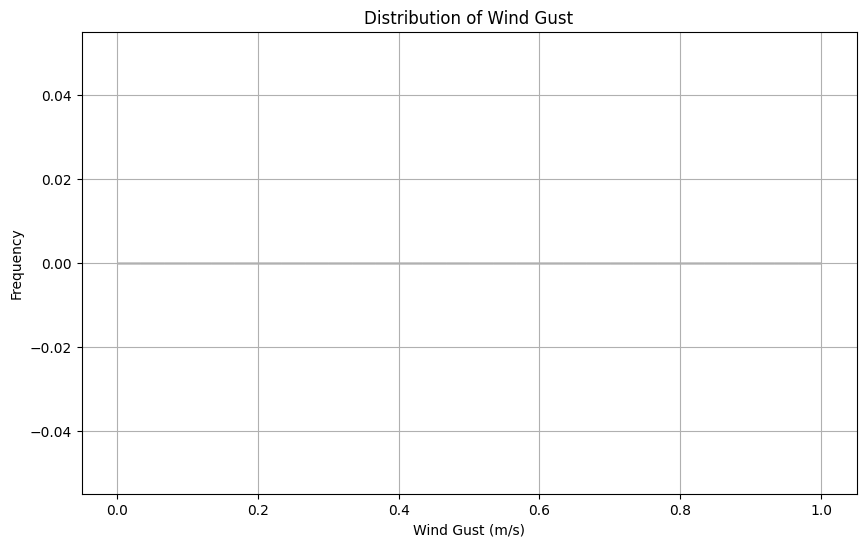

In [12]:
# Display descriptive statistics for wind gust
"""
This script performs descriptive statistical analysis and visualization on wind gust data from a weather dataset.
Wind gust refers to a sudden, brief increase in the speed of the wind. It is typically measured in meters per second (m/s).
Analyzing wind gust data can provide insights into the variability and intensity of wind conditions, which is important for 
various applications such as weather forecasting, aviation, and outdoor event planning.
The script includes the following steps:
1. Displaying descriptive statistics for wind gust data.
2. Plotting the distribution of wind gust data using a histogram.
"""
# Display descriptive statistics for wind gust data
wind_gust_stats = df_weather['wpgt'].describe()
print("Descriptive statistics for Wind Gust:")
print(wind_gust_stats)

# Plot the distribution of wind gust data using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_weather['wpgt'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Wind Gust')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# Exclude the 'date' column and calculate the mean value of each column
mean_values = df_weather.drop(columns=['date']).mean()
print("Mean value of each column:")
print(mean_values)

Mean value of each column:
tavg      26.991617
tmin      22.237247
tmax      32.996686
prcp       7.073603
snow            NaN
wdir     169.098145
wspd       8.399342
wpgt            NaN
pres    1007.402896
tsun            NaN
dtype: float64


Descriptive statistics for Precipitation:
count    6838.000000
mean        7.073603
std        21.150614
min         0.000000
25%         0.000000
50%         0.000000
75%         4.100000
max       470.900000
Name: prcp, dtype: float64


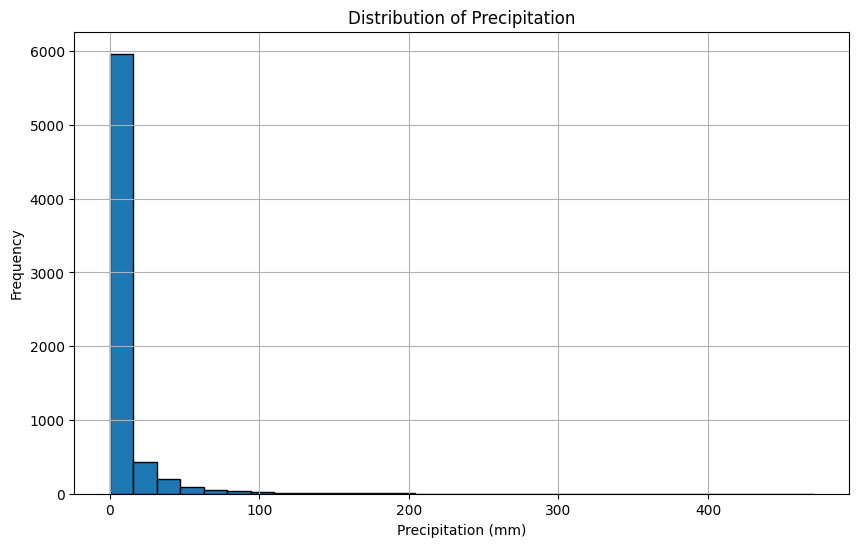

In [14]:
# Display descriptive statistics for Precipitation data
"""
This script performs the following tasks:
1. Displays descriptive statistics for Precipitation data:
    - Calculates and prints the descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) for the 'prcp' (precipitation) column in the df_weather DataFrame.
2. Plots the distribution of Precipitation data using a histogram:
    - Creates a histogram to visualize the distribution of precipitation values.
    - The histogram has 30 bins, with black edges for each bin.
    - The plot includes a title, x-axis label (Precipitation in mm), y-axis label (Frequency), and a grid for better readability.
Precipitation refers to any form of water - liquid or solid - falling from the sky, including rain, snow, sleet, and hail. It is typically measured in millimeters (mm).
"""
precipitation_stats = df_weather['prcp'].describe()
print("Descriptive statistics for Precipitation:")
print(precipitation_stats)

# Plot the distribution of Precipitation data using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_weather['prcp'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Convert the 'date' column to datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Extract the year from the 'date' column
df_weather['year'] = df_weather['date'].dt.year

# Group by year and calculate the maximum and minimum temperature for each year
yearly_temp_stats = df_weather.groupby('year').agg({'tmax': 'max', 'tmin': 'min'}).reset_index()

print("Maximum and Minimum Temperature for each year:")
print(yearly_temp_stats)

Maximum and Minimum Temperature for each year:
    year  tmax  tmin
0   1990  38.9  10.9
1   1991  43.9  10.5
2   1992  40.9   8.6
3   1993  40.6  10.9
4   1994  46.3  11.1
5   1995  42.0  11.0
6   1996  43.5   9.1
7   1997  41.4   9.5
8   1998  45.9  11.0
9   1999  42.2  10.9
10  2000  42.5  11.1
11  2001  44.6   9.9
12  2002  46.1  10.6
13  2003  44.9   9.0
14  2004  45.1  10.6
15  2005  46.3  11.4
16  2006  41.5  11.0
17  2007  40.5  12.6
18  2008  44.0  10.8
19  2009  44.6  13.0
20  2010  43.6  10.5
21  2011  42.6   9.9
22  2012  46.7   9.3
23  2013  42.6  11.0
24  2014  44.2  11.6
25  2015  45.4  12.6
26  2016  45.0  12.3
27  2017  43.0  11.2
28  2018  42.2   8.2
29  2019  43.2   9.5
30  2020  40.4  11.3
31  2021  42.4  10.0
32  2022  43.0  12.0


In [16]:
# Plot a horizontal bar graph for maximum and minimum temperatures of each year
fig = px.bar(yearly_temp_stats, 
             x=['tmax', 'tmin'], 
             y='year', 
             orientation='h', 
             title='Maximum and Minimum Temperatures for Each Year',
             labels={'year': 'Year', 'value': 'Temperature (°C)'},
             color_discrete_sequence=['#636EFA', '#EF553B'],
             width=800)  # Increase the width of the bars

# Update layout for a stylish theme
fig.update_layout(
    template='plotly_white',
    barmode='group',
    xaxis_title='Temperature (°C)',
    yaxis_title='Year',
    legend_title_text='Temperature Type'
)

# Update hover information to include year
fig.update_traces(hovertemplate='Year: %{y}<br>Temperature: %{x}°C', text=yearly_temp_stats['year'], textposition='inside')

fig.show()

In [17]:
# Find the year with the maximum temperature
max_temp_year = yearly_temp_stats.loc[yearly_temp_stats['tmax'].idxmax()]

# Find the year with the minimum temperature
min_temp_year = yearly_temp_stats.loc[yearly_temp_stats['tmin'].idxmin()]

print(f"The year with the maximum temperature is {max_temp_year['year']} with a temperature of {max_temp_year['tmax']}°C.")
print(f"The year with the minimum temperature is {min_temp_year['year']} with a temperature of {min_temp_year['tmin']}°C.")

The year with the maximum temperature is 2012.0 with a temperature of 46.7°C.
The year with the minimum temperature is 2018.0 with a temperature of 8.2°C.


Descriptive statistics for Pressure:
count    1243.000000
mean     1007.402896
std         5.756544
min       990.600000
25%      1002.900000
50%      1007.300000
75%      1012.400000
max      1019.300000
Name: pres, dtype: float64


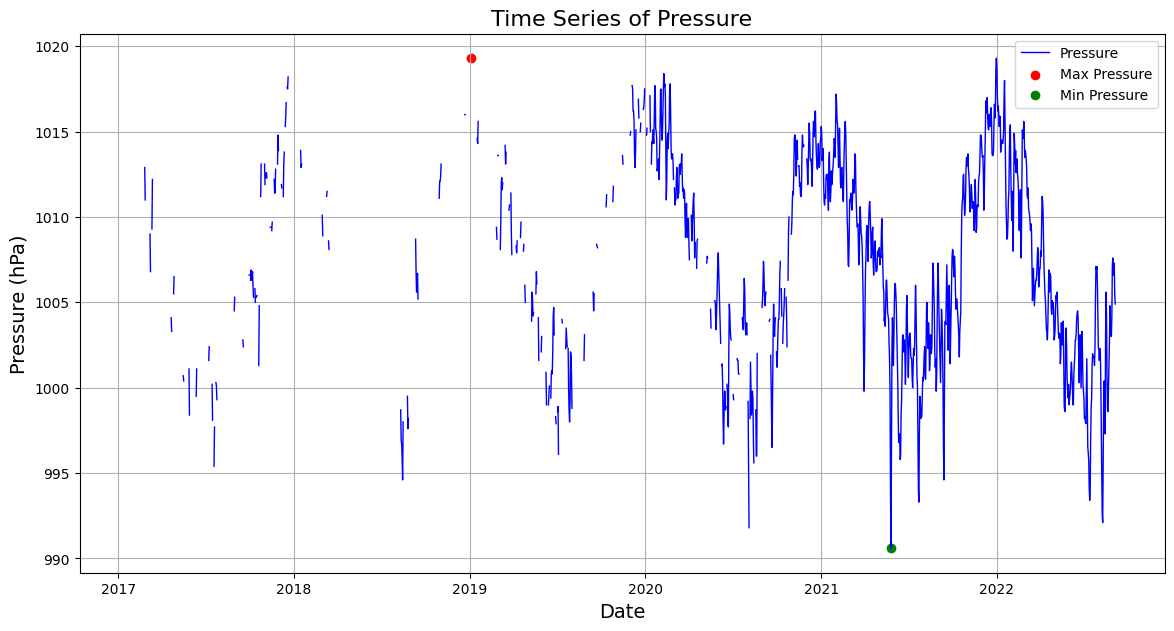

In [18]:
import plotly.graph_objects as go

# Display descriptive statistics for pressure data
pressure_stats = df_weather['pres'].describe()
print("Descriptive statistics for Pressure:")
print(pressure_stats)

# Plot the distribution of pressure data using a histogram
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_weather['pres'].dropna(), nbinsx=30, marker_color='skyblue', opacity=0.75))
fig.update_layout(
    title='Distribution of Pressure',
    xaxis_title='Pressure (hPa)',
    yaxis_title='Frequency',
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

# Plot a time series of pressure data
plt.figure(figsize=(14, 7))
plt.plot(df_weather['date'], df_weather['pres'], color='blue', linewidth=1, label='Pressure')
plt.scatter(df_weather['date'][df_weather['pres'].idxmax()], df_weather['pres'].max(), color='red', label='Max Pressure')
plt.scatter(df_weather['date'][df_weather['pres'].idxmin()], df_weather['pres'].min(), color='green', label='Min Pressure')
plt.title('Time Series of Pressure', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

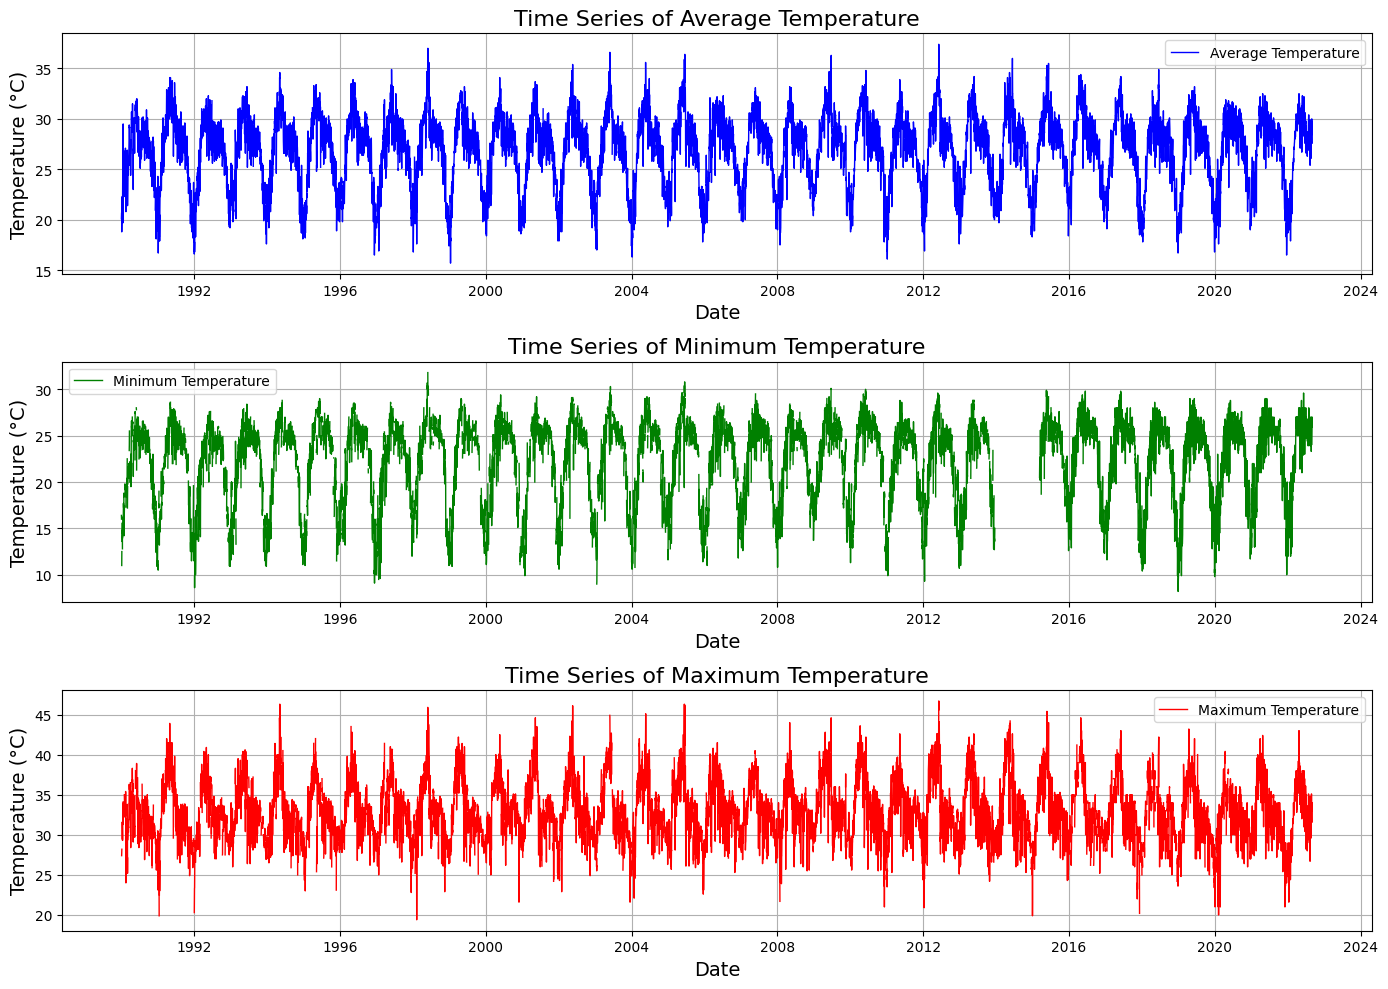

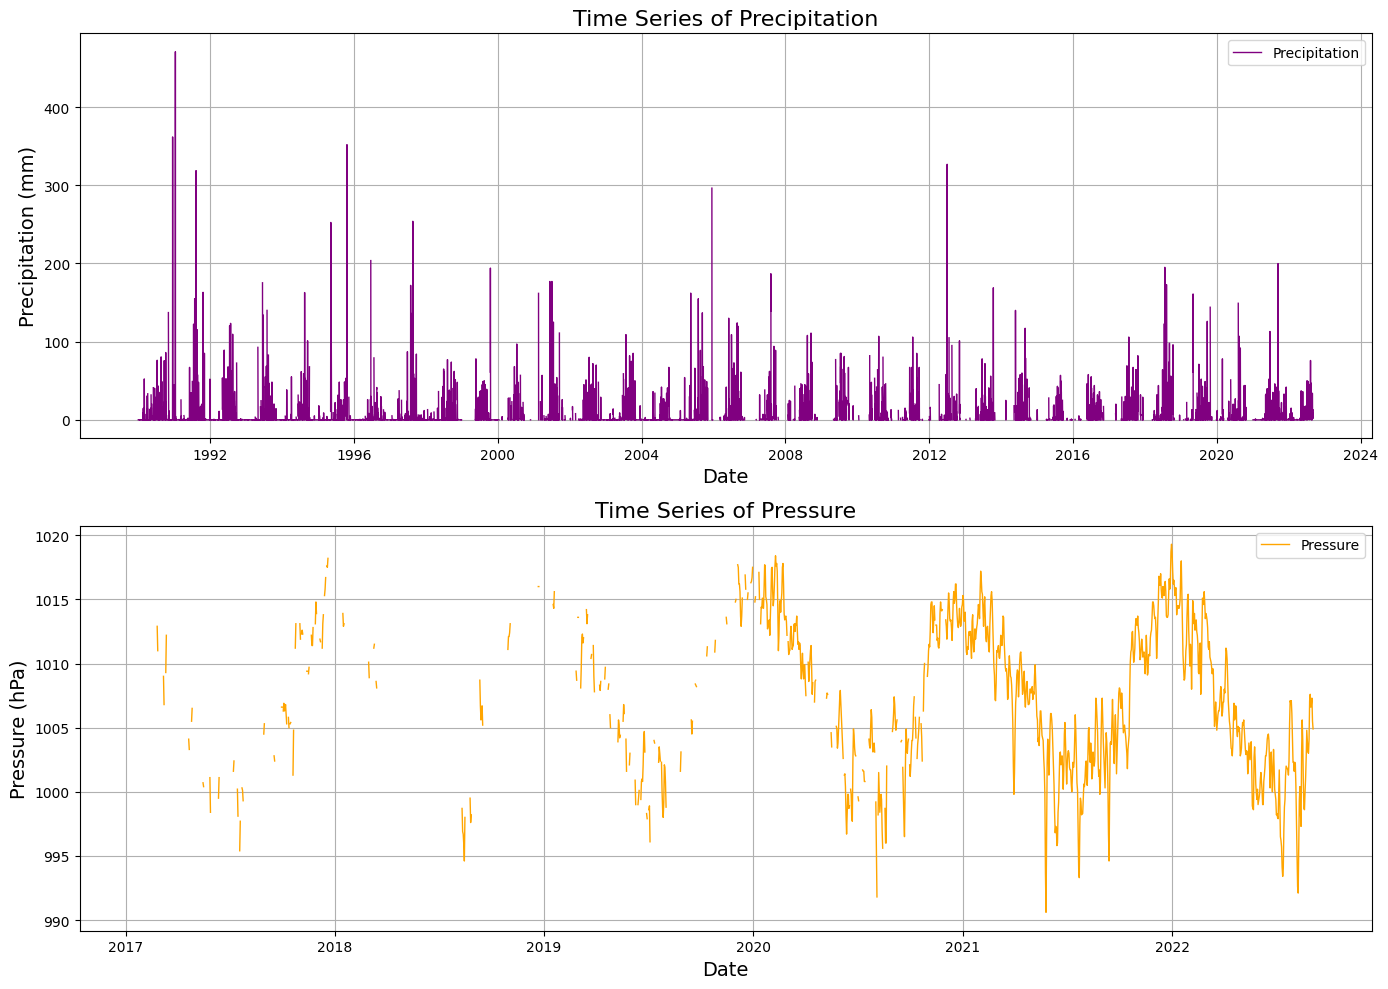

In [19]:
# Plot time series for average temperature, minimum temperature, maximum temperature, precipitation, and pressure
plt.figure(figsize=(14, 10))

# Average Temperature
plt.subplot(3, 1, 1)
plt.plot(df_weather['date'], df_weather['tavg'], color='blue', linewidth=1, label='Average Temperature')
plt.title('Time Series of Average Temperature', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True)

# Minimum Temperature
plt.subplot(3, 1, 2)
plt.plot(df_weather['date'], df_weather['tmin'], color='green', linewidth=1, label='Minimum Temperature')
plt.title('Time Series of Minimum Temperature', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True)

# Maximum Temperature
plt.subplot(3, 1, 3)
plt.plot(df_weather['date'], df_weather['tmax'], color='red', linewidth=1, label='Maximum Temperature')
plt.title('Time Series of Maximum Temperature', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot time series for precipitation and pressure
plt.figure(figsize=(14, 10))

# Precipitation
plt.subplot(2, 1, 1)
plt.plot(df_weather['date'], df_weather['prcp'], color='purple', linewidth=1, label='Precipitation')
plt.title('Time Series of Precipitation', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.legend()
plt.grid(True)

# Pressure
plt.subplot(2, 1, 2)
plt.plot(df_weather['date'], df_weather['pres'], color='orange', linewidth=1, label='Pressure')
plt.title('Time Series of Pressure', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Correlation Matrix:
          tavg      tmin      tmax      prcp  snow      wdir      wspd  wpgt  \
tavg  1.000000  0.912404  0.831260 -0.026629   NaN  0.361418  0.509834   NaN   
tmin  0.912404  1.000000  0.598421  0.074243   NaN  0.308277  0.486354   NaN   
tmax  0.831260  0.598421  1.000000 -0.204080   NaN  0.295799  0.437106   NaN   
prcp -0.026629  0.074243 -0.204080  1.000000   NaN  0.110781  0.069448   NaN   
snow       NaN       NaN       NaN       NaN   NaN       NaN       NaN   NaN   
wdir  0.361418  0.308277  0.295799  0.110781   NaN  1.000000  0.190289   NaN   
wspd  0.509834  0.486354  0.437106  0.069448   NaN  0.190289  1.000000   NaN   
wpgt       NaN       NaN       NaN       NaN   NaN       NaN       NaN   NaN   
pres -0.674845 -0.760739 -0.338440 -0.321733   NaN -0.341325 -0.370793   NaN   
tsun       NaN       NaN       NaN       NaN   NaN       NaN       NaN   NaN   

          pres  tsun  
tavg -0.674845   NaN  
tmin -0.760739   NaN  
tmax -0.338440   NaN  
prcp -0

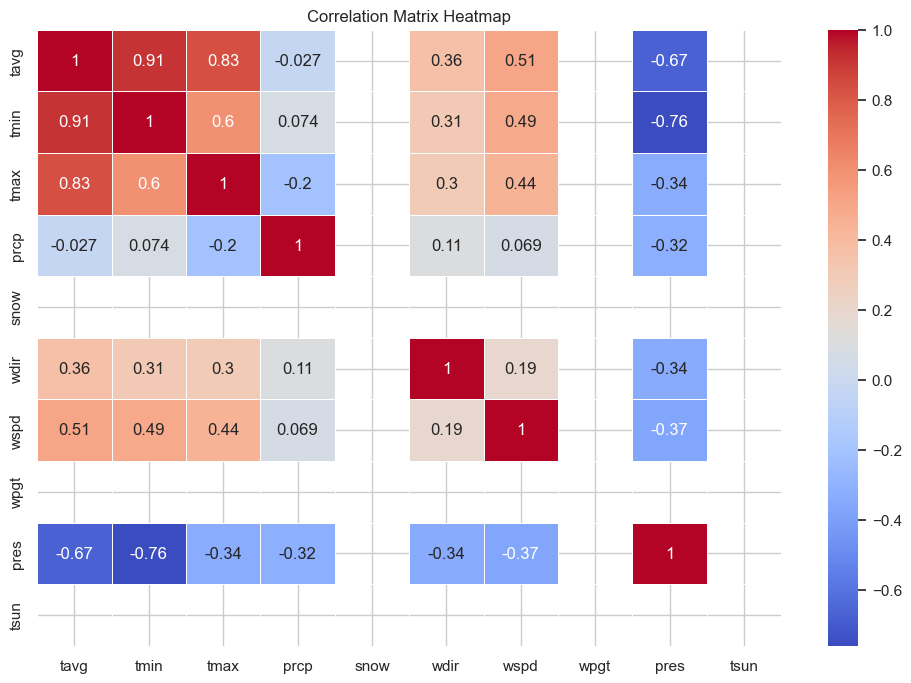

In [ ]:
import plotly.figure_factory as ff

# Calculate the correlation matrix for the specified columns
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
correlation_matrix = df_weather[columns_to_analyze].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

# Visualize specific relationships using scatter plots
fig = px.scatter_matrix(df_weather[columns_to_analyze].dropna(), dimensions=columns_to_analyze)
fig.update_layout(title='Scatter Matrix of Weather Data')
fig.show()